In [1]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.cm as cm
import numpy as np

In [2]:
def show_img(img,plt,titre):
    plt.imshow(img, cmap=cm.gray)
    plt.title(titre)
    plt.show()

In [3]:
from skimage.exposure import rescale_intensity
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()

			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	#output = rescale_intensity(output, in_range=(0, 255))
	#output = (output * 255).astype("uint8")

	# return the output image
	return output

In [4]:
img = cv2.imread('./images/Lena.png')
print img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(220, 220, 3)


In [27]:
def gradient_x(img):
    tmp=np.zeros(img.shape[:2])
    for i in range(1,img.shape[0]-1):
        tmp[i,:]=abs(img[i+1,:]-img[i,:])
    return tmp
def gradient_y(img):
    tmp=np.zeros(img.shape[:2])
    for i in range(1,img.shape[1]-1):
        tmp[:,i]=abs(img[:,i+1]-img[:,i])
    return tmp

In [28]:
g_x=gradient_x(gray)
g_y=gradient_y(gray)

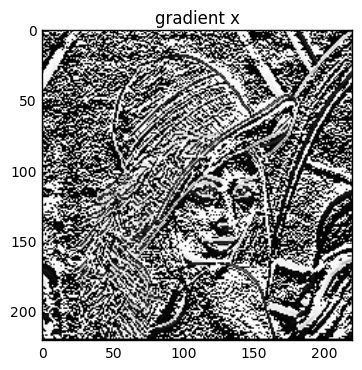

In [29]:
show_img(g_x,plt,"gradient x")

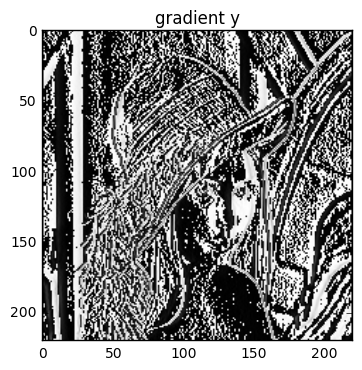

In [30]:
show_img(g_y,plt,"gradient y")

In [31]:
g=np.sqrt(g_x**2+g_y**2)

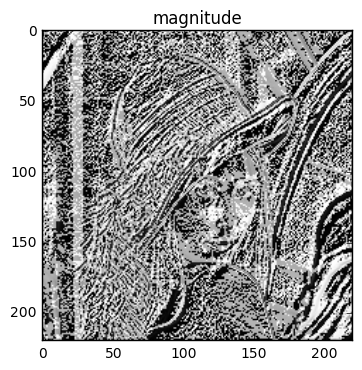

In [32]:
show_img(g,plt,"magnitude")

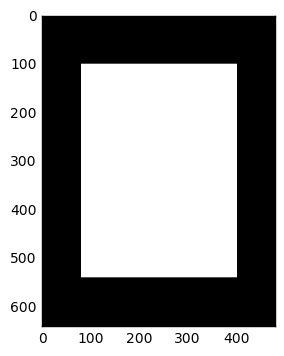

In [33]:
# Create a black image
img=np.zeros((640,480))
# ... and make a white rectangle in it
img[100:-100,80:-80]=1

# See how it looks
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [34]:
# Get x-gradient in "sx"
from scipy import ndimage
sx = ndimage.sobel(img,axis=0,mode='constant')

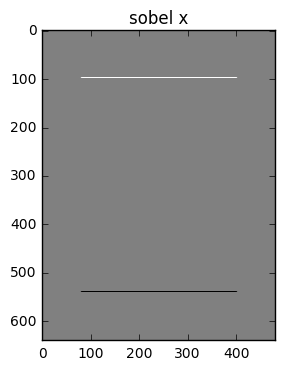

In [35]:
show_img(sx,plt,"sobel x")

In [36]:
sx=sx[sx!=0]
sx

array([ 1.,  3.,  4., ..., -4., -3., -1.])

In [37]:
sx1=gradient_x(img)

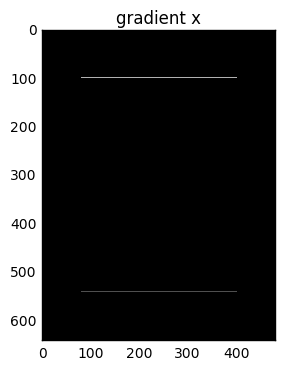

In [38]:
show_img(sx1,plt,"gradient x")

In [39]:
sx2=gradient_y(img)

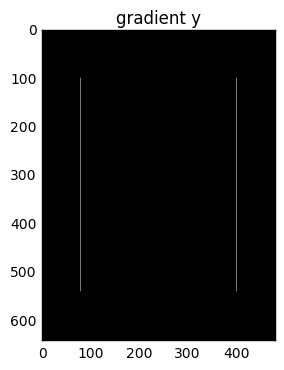

In [40]:
show_img(sx2,plt,"gradient y")

In [41]:
sx=np.sqrt(sx1**2+sx2**2)

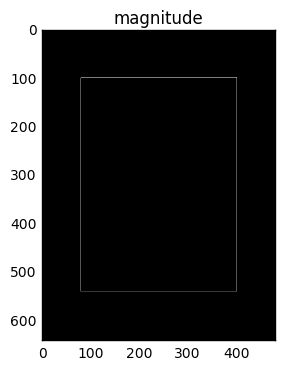

In [42]:
show_img(sx,plt,"magnitude")

In [48]:
import math
theta = np.arctan(sx2, sx1) 

In [49]:
theta

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

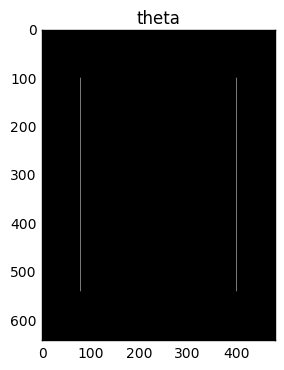

In [50]:
show_img(theta,plt,"theta")

In [51]:
theta2=np.arctan(g_y,g_x)

In [64]:
theta2.shape

(220, 220)

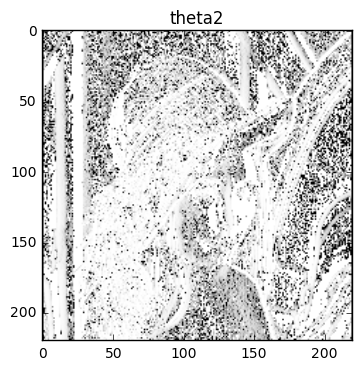

In [53]:
show_img(theta2,plt,"theta2")

In [60]:
img2=gray[theta2 > 1]
gray.shape

(220, 220)

In [66]:
#show_img(img2,plt,"theta2")
theta2.shape
t=theta2>1
t.shape

(220, 220)

TypeError: 'numpy.ndarray' object is not callable

In [70]:
img2.shape

(39577,)